In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('index.csv', encoding =  'unicode_escape')

In [3]:
df.shape

(896, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         896 non-null    object 
 1   datetime     896 non-null    object 
 2   cash_type    896 non-null    object 
 3   card         807 non-null    object 
 4   money        896 non-null    float64
 5   coffee_name  896 non-null    object 
dtypes: float64(1), object(5)
memory usage: 42.1+ KB


In [5]:
pd.isnull(df)

,date,datetime,cash_type,card,money,coffee_name
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
891,False,False,False,False,False,False
892,False,False,False,False,False,False
893,False,False,False,False,False,False
894,False,False,False,False,False,False


In [6]:
pd.isnull(df).sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [7]:
df.dropna(inplace= True)

In [8]:
df.shape

(807, 6)

In [9]:
df.dtypes

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

In [10]:
df['money']= df['money'].astype('int')

In [11]:
df.dtypes

date           object
datetime       object
cash_type      object
card           object
money           int64
coffee_name    object
dtype: object

In [12]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [13]:
df.describe()

,money
count,807.000000
mean,33.201983
std,4.509444
min,23.000000
25%,28.000000
50%,33.000000
75%,37.000000
max,38.000000


In [14]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Convert 'Date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the month and create a new column 'Month'
df['MonthName'] = df['date'].dt.month_name()

# Convert 'datetime' column to date
df['datetime'] = pd.to_datetime(df['datetime'])
# Convert 'datetime' column to time
df['time'] = df['datetime'].dt.time
# Convert 'datetime' column to day
df['DayOfWeek'] = df['date'].dt.day_name()
# Convert 'datetime' column to Hour
df['Hour'] = df['datetime'].dt.hour

In [25]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,MonthName,time,DayOfWeek,Hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38,Latte,March,10:15:50.520000,Friday,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38,Hot Chocolate,March,12:19:22.539000,Friday,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38,Hot Chocolate,March,12:20:18.089000,Friday,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28,Americano,March,13:46:33.006000,Friday,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38,Latte,March,13:48:14.626000,Friday,13


# **Exploratory Data Analysis**

# Sales By Coffee Category

In [26]:
brown_palette = ["#8B4513", "#A0522D", "#D2691E", "#CD853F", "#F4A460", "#DEB887"]

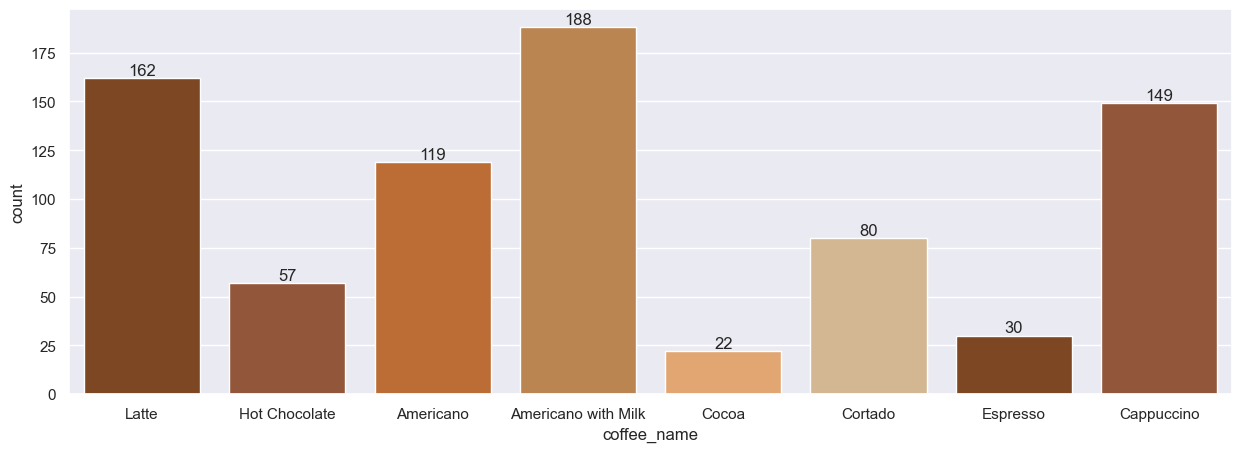

In [27]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(data = df, x = 'coffee_name', hue ='coffee_name', palette=brown_palette)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='coffee_name', ylabel='money'>

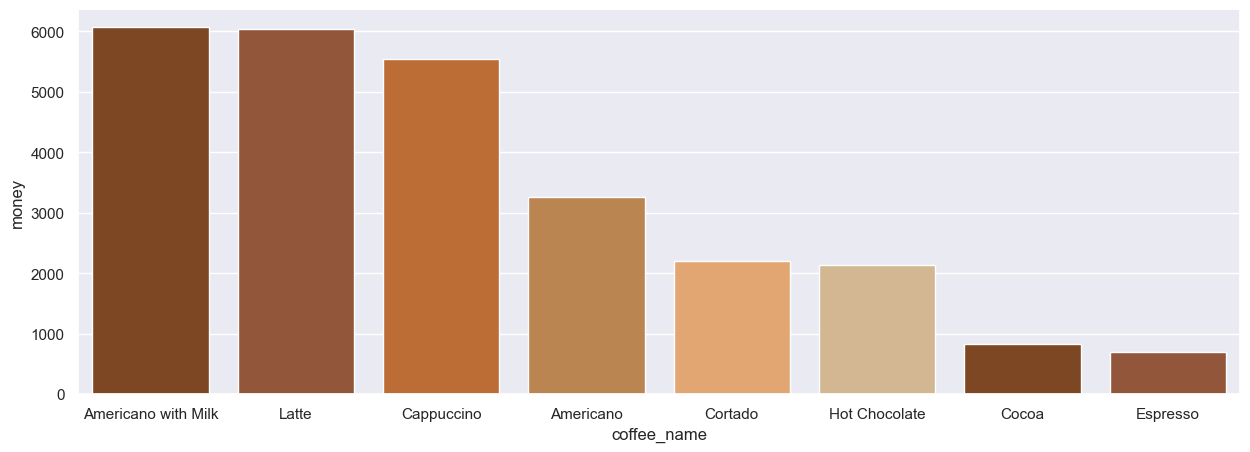

In [28]:
sales_cname = df.groupby(['coffee_name'], as_index=False)['money'].sum().sort_values(by='money', ascending=False)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'coffee_name',y= 'money' ,data = sales_cname, hue = 'coffee_name', palette=brown_palette)


From above graphs we can see that most of the orders & total sales/amount are from Americano with milk, Latte and Cappuccino respectively

# Sales By Day of Week

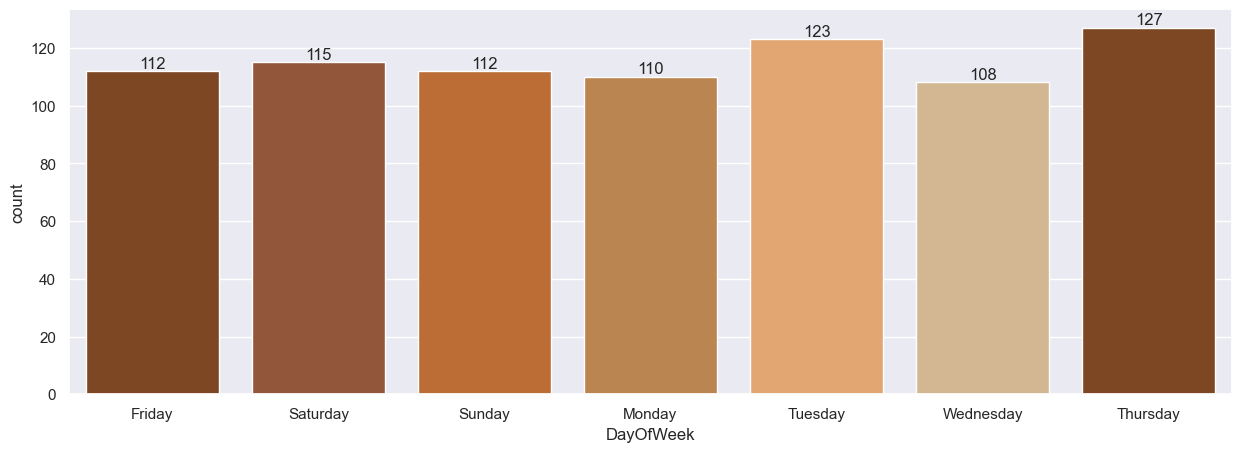

In [29]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(data = df, x = 'DayOfWeek', hue ='DayOfWeek', palette=brown_palette)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='DayOfWeek', ylabel='money'>

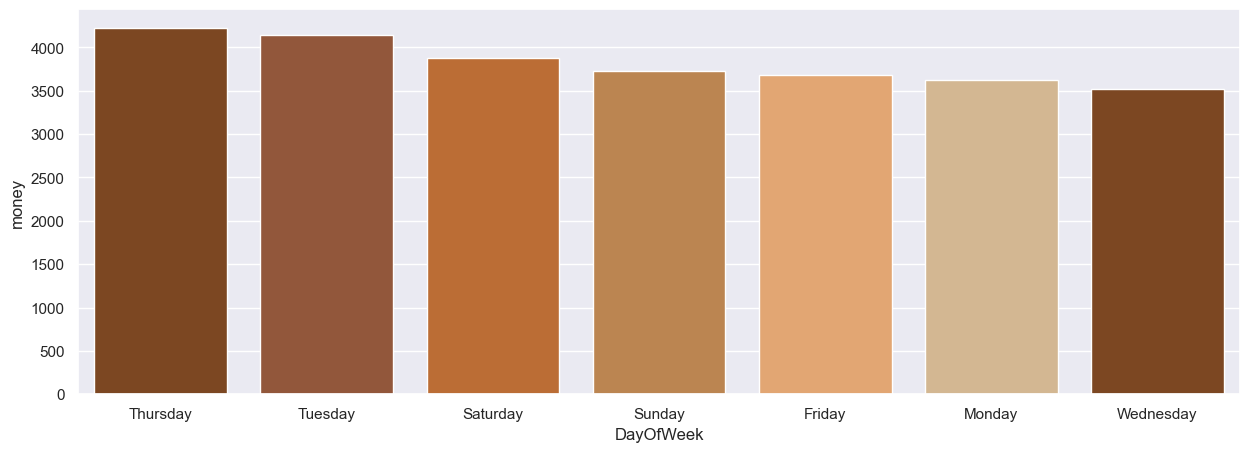

In [30]:
sales_day = df.groupby(['DayOfWeek'], as_index=False)['money'].sum().sort_values(by='money', ascending=False)

sns.barplot(x = 'DayOfWeek',y= 'money' ,data = sales_day, hue = 'DayOfWeek', palette=brown_palette)

From above graphs we can see that most coffee is sold on Thursday, Tuesday and Saturday respectively.

# Sales By Month

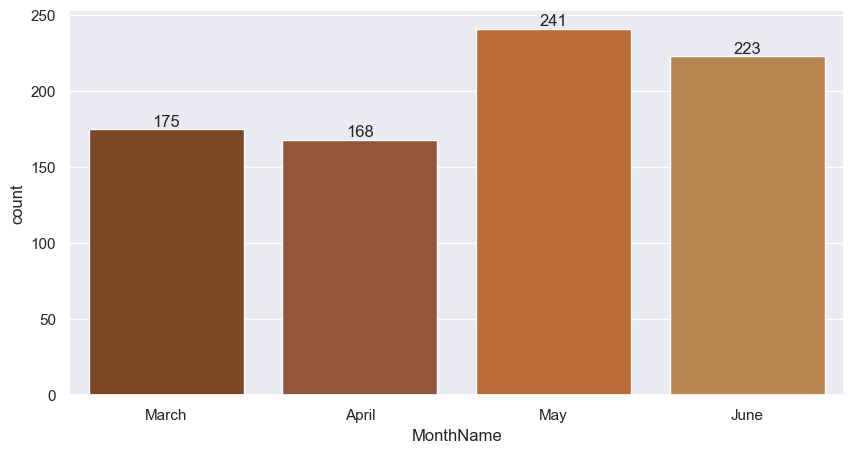

In [31]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(data = df, x = 'MonthName', hue ='MonthName', palette=brown_palette)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='MonthName', ylabel='money'>

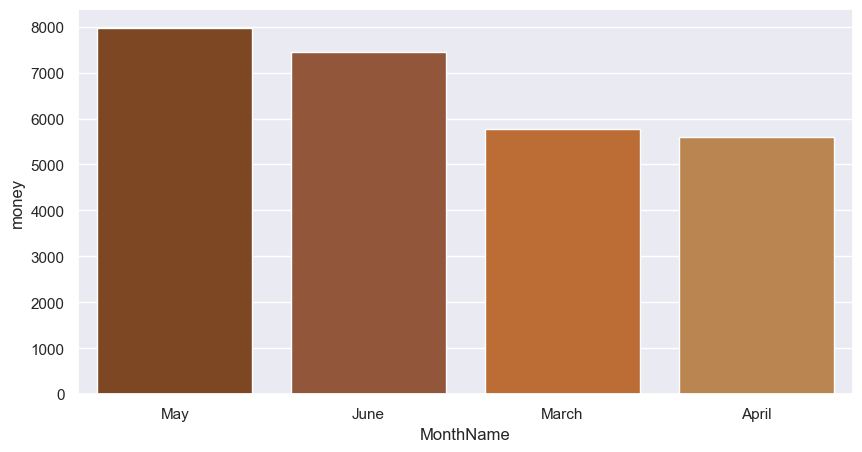

In [32]:
sales_month = df.groupby(['MonthName'], as_index=False)['money'].sum().sort_values(by='money', ascending=False)

sns.barplot(x = 'MonthName',y= 'money' ,data = sales_month, hue = 'MonthName', palette=brown_palette)

In May and June, coffee sales peaked both in quantity and total amount.

# Sales By Hour

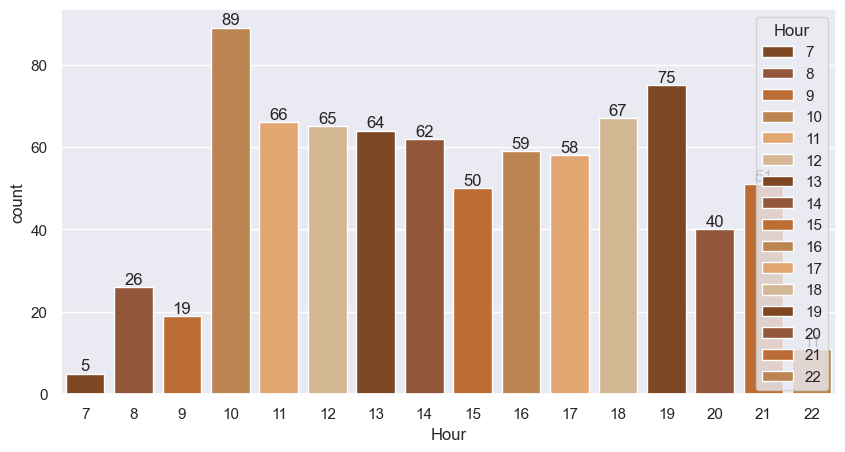

In [38]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(data = df, x = 'Hour', hue ='Hour', palette=brown_palette)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Hour', ylabel='money'>

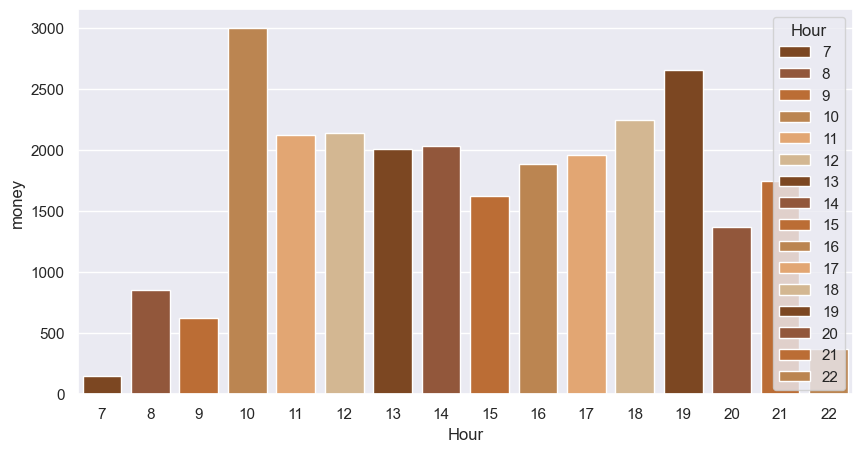

In [37]:
sales_hour = df.groupby(['Hour'], as_index=False)['money'].sum().sort_values(by='money', ascending=False)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x = 'Hour',y= 'money' ,data = sales_hour, hue = 'Hour', palette=brown_palette)

From the above graphs we can clearly see that at 10 AM, 6 Pm and 7 PM most coffee were sold according to count and money/Amount.

# **Conclusion**

Based on the analysis of the graphs, we can draw the following conclusions:

1. **Product Popularity**: The **most popular** coffee orders, in terms of both count and total sales amount, are **Americano with milk**, **Latte**, and **Cappuccino**.
2. **Sales by Day**: The highest coffee sales occur on **Thursdays**, followed by **Tuesdays** and **Saturdays**.
3. **Monthly Sales Peaks**: Coffee sales peak during the months of **May** and **June**, both in terms of quantity sold and total sales amount.
4. **Peak Sales Hours**: The busiest hours for coffee sales, both in terms of the number of orders and total sales amount, are at **10 AM**, **6 PM**, and **7 PM**.

These insights can help in understanding customer preferences and optimizing inventory and staffing during peak times.
